## AdaLine

Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Defining a random x1 , x2 generator

In [ ]:
def Generator(n : int , mu : list , sigma : list):
    x = []
    for i , m in enumerate(mu):
        x.append(np.random.normal(mu[i] , sigma[i] , n))
    return np.array(x)

Generate numbers

In [ ]:
np.random.seed(10)
x1 = Generator(100 , [1,1] , [0.3,0.3])
x2 = Generator(100 , [-1,-1] , [0.3,0.3])
t1 = np.ones(x1.shape[1])
t2 = -np.ones(x2.shape[1])
x = np.vstack((x1.T , x2.T))
t = np.append(t1 , t2)

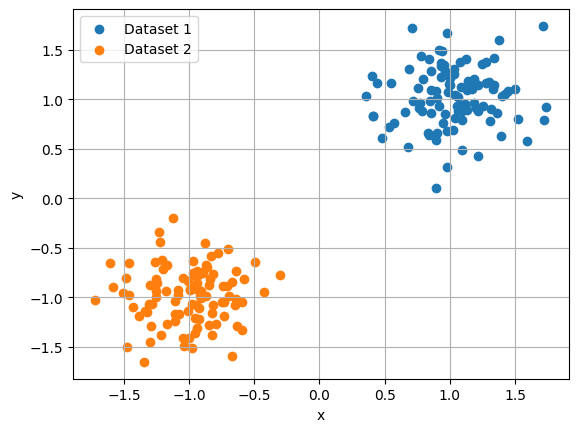

In [ ]:
plt.scatter(*x1 , label = 'Dataset 1')
plt.scatter(*x2 , label = 'Dataset 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Shuffle

In [ ]:
def shuffle(data , label):
    idx = np.arange(len(label))
    np.random.shuffle(idx)
    return data[idx] , label[idx]

In [ ]:
np.random.seed(10)
x_new , t_new = shuffle(x , t)

Desinging the network

In [ ]:
np.random.seed(10)
w = np.random.rand(2)
b = np.random.rand(1)
alpha = 0.2 #Learning Rate
threshold = 0.1

In [ ]:
print(f'w={w}')
print(f'b={b}')

w=[0.77132064 0.02075195]
b=[0.63364823]


In [ ]:
for j in range(1000):
    h = []
    for i , s in enumerate(x_new):
        net = w[0]*s[0]+w[1]*s[1]+b
        w = w + alpha*(t_new[i]-net)*s
        b = b + alpha*(t_new[i]-net)

        h.append(w[0]*s[0]+w[1]*s[1]+b)
    h = np.array(h).reshape(len(h))
    print(j)
    error = (0.5*(h-t_new)**2)
    if np.unique(( error < threshold)).all() : break

0


In [ ]:
error.sum()

1.202335498287651

In [ ]:
print(f'w={w}')
print(f'b={b}')

w=[0.59395774 0.46032583]
b=[0.0367658]


Plot the Discriminant line

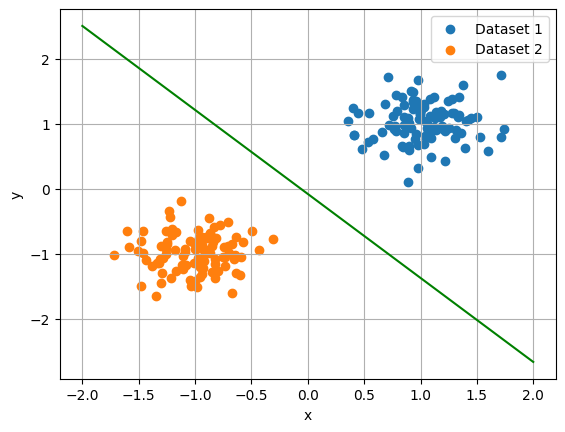

In [ ]:
z = np.linspace(-2 , 2 , 100)
plt.scatter(*x1 , label = 'Dataset 1')
plt.scatter(*x2 , label = 'Dataset 2')
plt.plot(z , -z*w[0]/w[1] - b/w[1] , '-g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.random.seed(10)
x1 = Generator(100 , [0,0] , [0.6,0.6])
x2 = Generator(20 , [2,2] , [0.8,0.8])
t1 = np.ones(x1.shape[1])
t2 = -np.ones(x2.shape[1])
x = np.vstack((x1.T , x2.T))
t = np.append(t1 , t2)

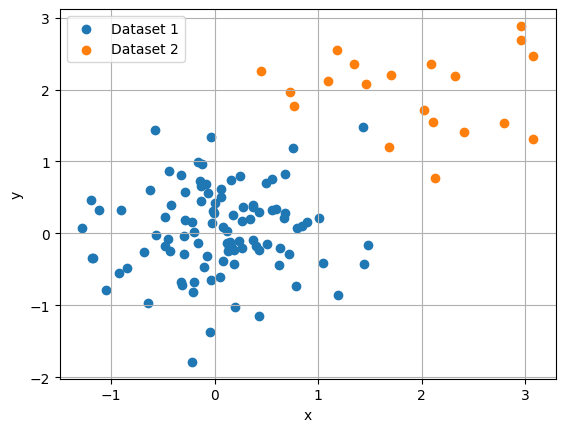

In [ ]:
plt.scatter(*x1 , label = 'Dataset 1')
plt.scatter(*x2 , label = 'Dataset 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.random.seed(10)
x_new , t_new = shuffle(x , t)

In [ ]:
np.random.seed(10)
w = np.random.rand(2)
b = np.random.rand(1)
alpha = 0.2 #Learning Rate
threshold = 0.1

In [ ]:
e = []
for j in range(1000):
    h = []
    for i , s in enumerate(x_new):
        net = w[0]*s[0]+w[1]*s[1]+b
        w = w + alpha*(t_new[i]-net)*s
        b = b + alpha*(t_new[i]-net)

        h.append(w[0]*s[0]+w[1]*s[1]+b)
    h = np.array(h).reshape(len(h))
    error = (0.5*(h-t_new)**2)
    e.append(error.sum())
    if np.unique(( error < threshold)).all() : break

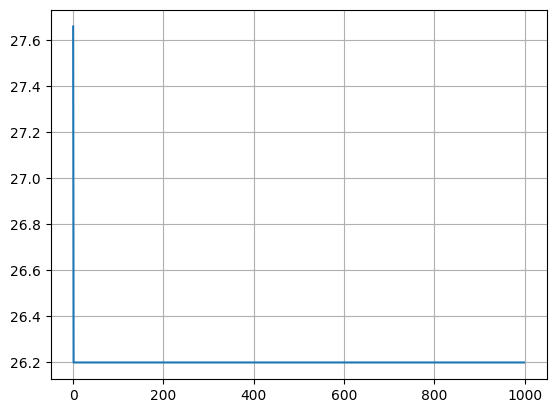

In [ ]:
plt.plot(e)
plt.grid()
plt.show()

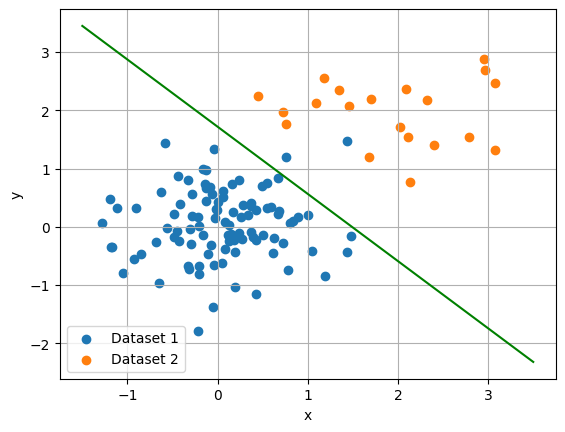

In [ ]:
z = np.linspace(-1.5 , 3.5 , 100)
plt.scatter(*x1 , label = 'Dataset 1')
plt.scatter(*x2 , label = 'Dataset 2')
plt.plot(z , -z*w[0]/w[1] - b/w[1] , '-g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Madaline

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading datas

In [ ]:
df = pd.read_csv('./MadaLine.csv'  , names= ['x0','x1','t'])

In [ ]:
x = df.iloc[:, :2].to_numpy().copy()
t = df['t'].to_numpy().copy()

Plot datas

In [ ]:
np.random.seed(20)
x_new , t_new = shuffle(x , t)
t_new = np.where(t_new == 0 , -1 , 1)

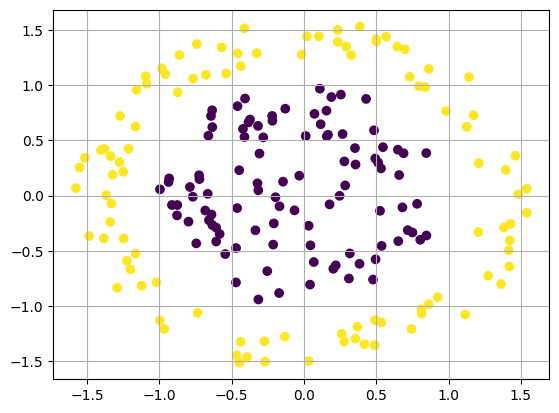

In [ ]:
plt.scatter(*x_new.T , c=t_new)
plt.grid()
plt.show()

Defining a class for MadaLine

In [ ]:
class MadaLine():
    def __init__(self , hidden_layer_neurons_number : int , alpha : float):
        """n : number of the hidden neurons
        
        alpha : Learning Rate"""
        self.hidden_n = hidden_layer_neurons_number
        # step 0 : initialize v and b2
        self.v = np.ones(hidden_layer_neurons_number)
        self.b_h = hidden_layer_neurons_number
        self.h = np.zeros(hidden_layer_neurons_number)
        self.alpha = alpha

    def train(self , x : np.ndarray , t : np.ndarray , epoch : int):
        self.x = x
        self.t = t
        self.input_n = x.shape[1]
        self.targt_n = 1
        # step 0 : initialize w with random number
        self.w = np.random.random((self.hidden_n , self.input_n))
        self.b = np.random.random(self.hidden_n)

        for ep in range(epoch):
            w_temp = self.w
            b_temp = self.b
            #step 3~7 train
            for i , s in enumerate(self.x):
                h = self.w @ s + self.b
                z = np.where(h < 0 , -1 , 1)
                if z @ self.v + self.b_h < 2 :
                    y = -1
                else : 
                    y = 1
                if y == t[i] : 
                    pass
                elif t[i] == 1: 
                    k = np.abs(h).argmin()
                    self.w[k] = self.w[k] + self.alpha * (1-h[k])*s
                    self.b[k] = self.b[k] + self.alpha * (1-h[k])
                elif t[i] == -1:
                    k = np.where(h>0)[0]
                    self.w[k] = self.w[k] + self.alpha * (-1-h[k]).reshape(1,-1).T @ s.reshape(1,-1)
                    self.b[k] = self.b[k] + self.alpha * (-1-h[k])

    def predict(self , x : np.ndarray):
        t = []
        for s in x:
            h = self.w @ s + self.b
            z = np.where(h < 0 , -1 , 1)
            if z @ self.v + self.b_h < 2 :
                    y = -1
            else : 
                    y = 1
            t.append(y)
        return np.array(t)
    
    def accuracy(self , t : np.ndarray , t_predicted : np.ndarray):
        TF , count = np.unique (t_predicted == t_new , return_counts=True)
        dic = {TF[i] : count[i] for i in range(len(TF))}
        acc = dic[True]/(dic[True]+dic[False])
        return acc

    def plot(self , x : np.ndarray , t : np.ndarray , range : list):
        plt.scatter(*x_new.T , c=t_new)
        plt.grid()
        x1 = np.linspace(*range , 100)
        for i,j in enumerate(self.w):
            w = j
            b = self.b[i]
            x2 =- x1 * w[0]/w[1] - b/w[1]
            plt.plot(x1 , x2)
        plt.xlim(range)
        plt.ylim(range)
        plt.show()

In [ ]:
np.random.seed(10)
model = MadaLine(hidden_layer_neurons_number=4 , alpha= 0.01)

In [ ]:
model.train(x_new , t_new , epoch=200)

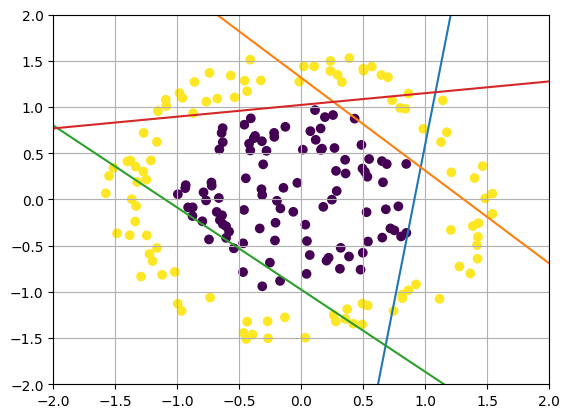

In [ ]:
model.plot(x_new , t_new , [-2,2])

In [ ]:
tp = model.predict(x_new)
model.accuracy(t_new , tp)

0.91